In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Importing the data

In [2]:
d=pd.read_csv('train_ctrUa4K.csv')

In [3]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
d.shape

(614, 13)

# Checking for missing Values

In [10]:
(d.isnull().sum()/d.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
import numpy as np

# Imputing the missing values with median and most frequent values

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
cat_feat=[i for i in d.columns if d[i].dtype=='O']
cont_feat=[i for i in d.columns if d[i].dtype!='O']

In [19]:
sm=SimpleImputer(strategy='most_frequent')

In [21]:
for i in cat_feat:
    d[i]=sm.fit_transform(np.array(d[i]).reshape(-1,1))

In [22]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
d.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
import scipy.stats as st

# Function to see the distribution

In [35]:
def Diagnosticplot(data,category):
    
    plt.figure(figsize=(12,8))
    
    
    
    plt.subplot(1,3,1)
    
    data[category].plot(kind='hist',bins=30)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    st.probplot(data[category],plot=plt,dist='norm',fit=True)
    plt.title('Probplot')
    
    
    plt.subplot(1,3,3)
    sns.boxplot(data[category])
    plt.title('Boxplot')
    plt.show()
    
    

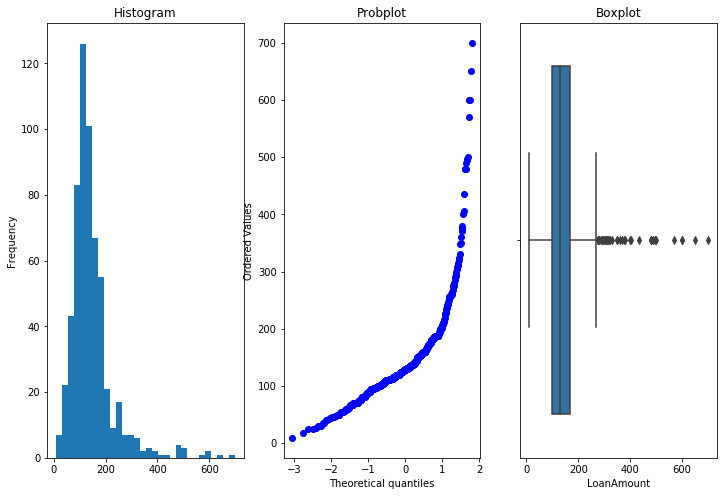

In [36]:
Diagnosticplot(d,'LoanAmount')

In [37]:
d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
d.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
d.LoanAmount=d['LoanAmount'].fillna(d['LoanAmount'].median())

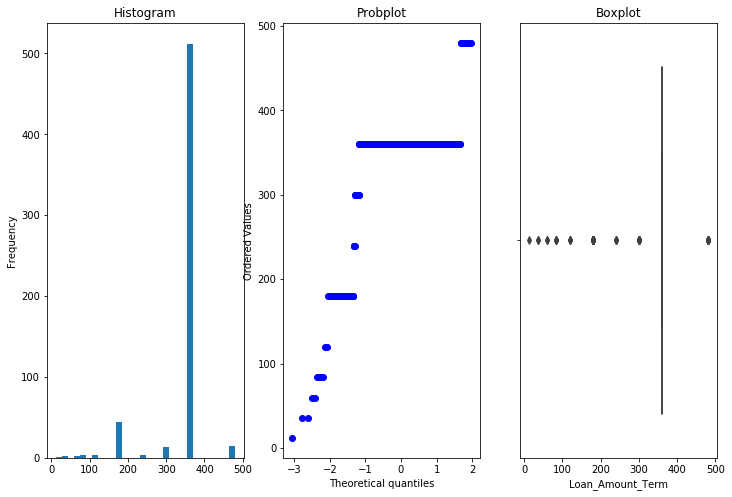

In [42]:
Diagnosticplot(d,'Loan_Amount_Term')

In [44]:
d.Loan_Amount_Term=d['Loan_Amount_Term'].fillna(d['Loan_Amount_Term'].median())

In [49]:
d.Credit_History=d['Credit_History'].fillna(d['Credit_History'].median())

In [50]:
d.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
d['Loan_Status']=d['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)

In [55]:
x=d.drop(columns=['Loan_Status'])
y=d['Loan_Status']

In [59]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [63]:
a=d.groupby('Education')['Education'].count()/len(d)

# Checking for high cardinatily


In [65]:
a[a>0.05].index

Index(['Graduate', 'Not Graduate'], dtype='object', name='Education')

In [71]:
for cat in cat_feat:
    temp=d.groupby(cat)[cat].count()/len(d)
    
    print(d[cat].nunique())
    

2
2
4
2
2
3
2


In [70]:
cat_feat.pop(0)

'Loan_ID'

In [68]:
d.drop(columns=['Loan_ID'],inplace=True)

In [74]:
a=d.groupby('Dependents')['Dependents'].count()/len(d)

# MeanEncoding Categorical Features

In [76]:
def MeanEncoding(data,category,target):
    mpp=data.groupby(category)[target].mean()
    data[category]=data[category].map(mpp)
    return data

In [79]:
for i in d.columns:
    d=MeanEncoding(d,i,'Loan_Status')

In [80]:
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.691235,0.629108,0.686111,0.708333,0.687970,1.000000,0.648352,0.575758,0.697719,0.790476,0.658416,1
1,0.691235,0.718204,0.647059,0.708333,0.687970,0.333333,0.000000,0.575758,0.697719,0.790476,0.614525,0
2,0.691235,0.718204,0.686111,0.708333,0.682927,0.666667,0.648352,0.500000,0.697719,0.790476,0.658416,1
3,0.691235,0.718204,0.686111,0.611940,0.687970,1.000000,1.000000,0.850000,0.697719,0.790476,0.658416,1
4,0.691235,0.629108,0.686111,0.708333,0.687970,0.666667,0.648352,1.000000,0.697719,0.790476,0.658416,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.669643,0.629108,0.686111,0.708333,0.687970,1.000000,0.648352,0.600000,0.697719,0.790476,0.614525,1
610,0.691235,0.718204,0.647059,0.708333,0.687970,1.000000,0.648352,1.000000,0.659091,0.790476,0.614525,1
611,0.691235,0.718204,0.647059,0.708333,0.687970,1.000000,1.000000,1.000000,0.697719,0.790476,0.658416,1
612,0.691235,0.718204,0.752475,0.708333,0.687970,1.000000,0.648352,0.750000,0.697719,0.790476,0.658416,1


# Spliting the data

In [90]:
x_train,x_test,y_train,y_test=train_test_split(d.drop(columns=['Loan_Status']),d['Loan_Status'],test_size=0.3,random_state=100)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [93]:
x_train[cont_feat]=scaler.fit_transform(x_train[cont_feat])
x_test[cont_feat]=scaler.transform(x_test[cont_feat])

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
51,0.669643,0.629108,0.686111,0.708333,0.687970,0.718546,-0.134520,0.577084,0.148863,0.407137,0.768240
231,0.691235,0.718204,0.686111,0.708333,0.687970,0.718546,-0.134520,1.135768,-0.380252,0.407137,0.614525
545,0.691235,0.718204,0.686111,0.708333,0.687970,0.718546,1.004123,-0.105752,0.148863,0.407137,0.614525
354,0.669643,0.718204,0.686111,0.708333,0.687970,0.718546,1.004123,1.135768,0.148863,0.407137,0.768240
312,0.669643,0.629108,0.686111,0.708333,0.687970,0.718546,-0.134520,1.135768,0.148863,0.407137,0.614525
...,...,...,...,...,...,...,...,...,...,...,...
578,0.691235,0.718204,0.647059,0.708333,0.687970,0.718546,1.004123,1.135768,0.148863,0.407137,0.614525
53,0.691235,0.718204,0.752475,0.708333,0.687970,-1.658750,-0.134520,0.204628,0.148863,0.407137,0.658416
350,0.691235,0.718204,0.686111,0.708333,0.687970,0.718546,-0.134520,1.135768,0.148863,0.407137,0.768240
79,0.691235,0.718204,0.647059,0.611940,0.682927,0.718546,1.004123,1.135768,0.148863,0.407137,0.768240


# Fitting Different Models for the data

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [98]:
y_pred=lg.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score,classification_report

In [100]:
accuracy_score(y_test,y_pred)

0.972972972972973

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.98      0.98      0.98       122

    accuracy                           0.97       185
   macro avg       0.97      0.97      0.97       185
weighted avg       0.97      0.97      0.97       185



In [102]:
lg_acc=accuracy_score(y_pred,y_pred)

In [103]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [104]:
rf=RandomForestClassifier(n_estimators=200,max_depth=4,random_state=100)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=100)

In [105]:
y_pred_rf=rf.predict(x_test)

In [106]:
accuracy_score(y_pred_rf,y_test)

0.972972972972973

In [107]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.98      0.98      0.98       122

    accuracy                           0.97       185
   macro avg       0.97      0.97      0.97       185
weighted avg       0.97      0.97      0.97       185



In [108]:
rf_accuracy=accuracy_score(y_test,y_pred_rf)

In [109]:
gb=GradientBoostingClassifier(n_estimators=200,max_depth=4,random_state=100)
gb.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=100)

In [110]:
y_pred_gb=gb.predict(x_test)

In [112]:
gb_acc=accuracy_score(y_test,y_pred_gb)

In [113]:
ad=AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,random_state=100),n_estimators=200)

In [114]:
ad.fit(x_train,y_train)
y_pred_ad=ad.predict(x_test)
accuracy_score(y_test,y_pred_ad)

0.9567567567567568

In [115]:
acc_ad=accuracy_score(y_test,y_pred_ad)

In [119]:
result=pd.DataFrame({'Model':['LogisticRegression','RandomForest','GradientBoosting','AdaBoostClassifier'],'Accuracy':[lg_acc,rf_accuracy,gb_acc,acc_ad]})

# Final Result

In [120]:
result.head()

,Model,Accuracy
0,LogisticRegression,1.000000
1,RandomForest,0.972973
2,GradientBoosting,0.962162
3,AdaBoostClassifier,0.956757


# Selecting the important features

In [121]:
from sklearn.feature_selection import SelectFromModel

In [122]:
sel=SelectFromModel(LogisticRegression(C=1000,max_iter=300,random_state=100))
sel.fit(x_train,y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, max_iter=300,
                                             random_state=100))

In [123]:
lg_mask=sel.get_support()

In [124]:
sel=SelectFromModel(RandomForestClassifier(n_estimators=200,max_depth=4))
sel.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=4, n_estimators=200))

In [125]:
rf_mask=sel.get_support()

In [126]:
sel=SelectFromModel(GradientBoostingClassifier(n_estimators=200,max_depth=4))
sel.fit(x_train,y_train)

SelectFromModel(estimator=GradientBoostingClassifier(max_depth=4,
                                                     n_estimators=200))

In [127]:
gb_mask=sel.get_support()

In [128]:
votes=np.sum([lg_mask,rf_mask,gb_mask],axis=0)

# Bar Plot Showing the important feature

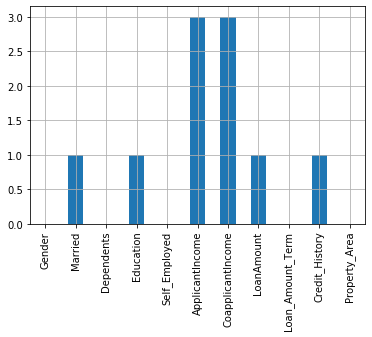

In [140]:
pd.Series(votes,index=x_train.columns).plot(kind='bar',grid=True)

# Pie chart showing important features

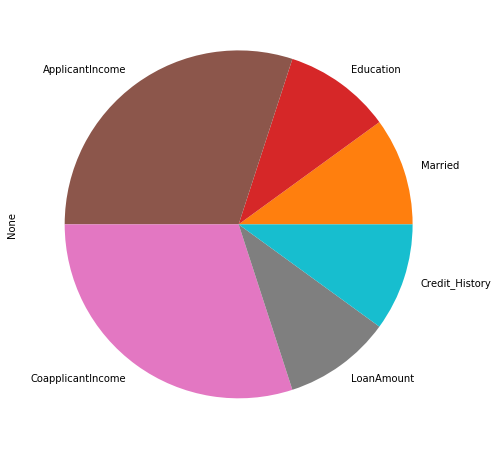

In [143]:
pd.Series(votes,index=x_train.columns).plot(kind='pie',grid=True,figsize=(12,8))